In [88]:
import matplotlib.pyplot as plt
import numpy as np

In [108]:
## the files 0, 1, 2, 3 are for the long time case.
times = []
diffs = []
diffs2 = []

name = "Time-2022-12-21-0003.txt"

data = open("data/2022-12-21/"+name, "r")

ii = 0
for row in data:
    ii += 1
    row = row.replace("\n", "")
    row = row.replace(",", ".")
    terms = row.split("\t")
    terms = np.sort([float(terms[term]) for term in range(len(terms))])
    diffs = diffs + [terms[i+1] - terms[i] for i in range(len(terms)-1)]
    for term in terms:
        
        if float(term) > 1:
            #print(float(term))
            times.append(float(term))

for _ in range(ii):
    times_aus = np.random.choice(times, int(len(times)/ii), replace=False)
    times_aus = np.sort(times_aus)
    diffs2 = diffs2 + [float(times_aus[i+1]) - float(times_aus[i]) for i in range(len(times_aus)-1)]

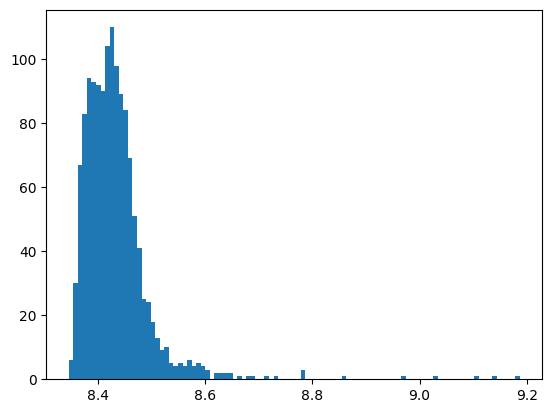

In [109]:
plt.hist(times, bins=np.linspace(min(times), max(times), 100))
plt.show()

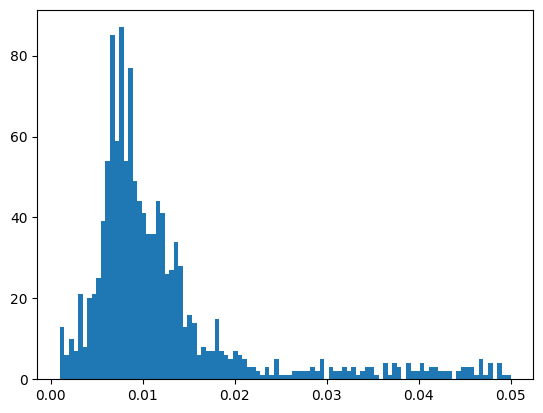

In [110]:
plt.hist(diffs, bins=np.linspace(0.001, 0.05, 100))
plt.show()

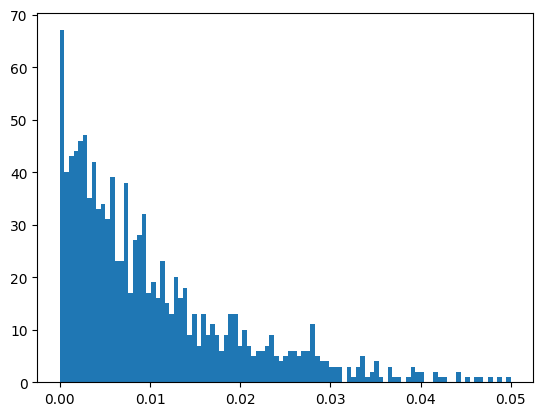

In [111]:
plt.hist(diffs2, bins=np.linspace(0, 0.05, 100))
plt.show()

# numerical experiment

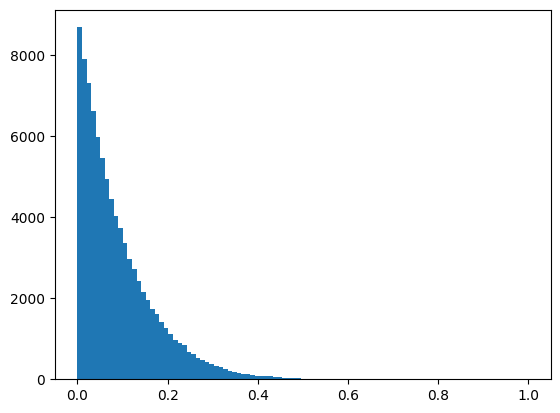

In [176]:
t_range = 10
reps = 10000
diffs3 = []
for _ in range(reps):
    t_i = np.sort(np.random.random(t_range))
    diffs3 = diffs3 + [t_i[i+1] - t_i[i] for i in range(t_range - 1)]

plt.hist(diffs3, bins=np.linspace(0,1,100))
plt.show()